# A demo of Hilbert-Huang Transform

时频分析是非平稳信号处理的基础课题。典型的基于窗口的方法（包括短时傅里叶变换和小波变换）假设系统是线性的，因此它们通过积分变换将信号线性投影到一系列预定义的基函数（以时间和频率为索引）中。然而，通过积分定义时频谱不可避免地会导致不确定性规则：能量分布无法同时很好地集中在频率和时间轴上。此外，线性假设并不总是成立，尤其是在存在非线性调制的情况下。尽管有人可能会认为调制信号仍然存在基函数的表示（例如，cos A cos B = 1/2 cos(A+B) + 1/2 cos(A-B)，仅仅是一个频移），但这会不必要地引入许多恼人的谐波，这些谐波实际上是数学上的伪像。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from pysdkit import HHT
from pysdkit.data import test_hht
from pysdkit.plot import plot_signal

生成两个高斯调制二次线性调频的混合信号，采样率均为 1000Hz，信号持续时间为 2.0s。

In [2]:
# 采样频率
fs = 1000
# 时间长度
duration = 2

# 获取时间数组和信号
time, signal = test_hht(duration=duration, sampling_rate=fs)

time.shape, signal.shape

((2000,), (2000,))

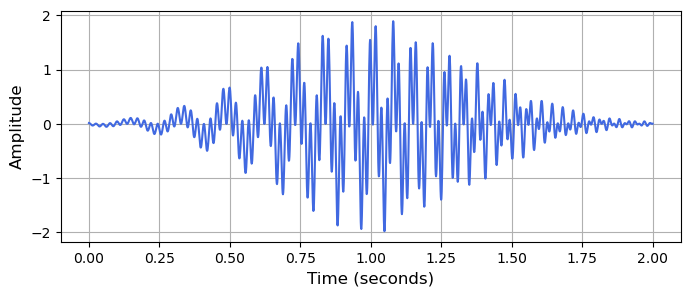

In [5]:
# 对信号进行可视化
plot_signal(time, signal);

现在让我们执行经验模态分解（EMD）。